In [1]:
import pandas as pd
import os
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import seaborn as sb
from sklearn.cluster import KMeans as km

In [2]:
file = "E:\\python folder\\Mall_Customers (1).csv"


# Creating Pandas Dataframe

In [3]:
df = pd.read_csv(file)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Creating a Scatterplot using Seaborn

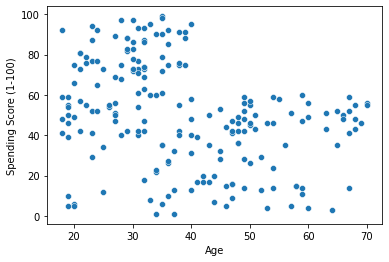

In [4]:
a = sb.scatterplot(y = "Spending Score (1-100)" , x = "Age" , data = df)

# slicing the DataFrame using iloc

In [5]:
x = df.iloc[:,[2,4]]
x

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


# Identifying number of clusters using Elbow Method

In [6]:
noofclusters = []

for a in range(1,15):
    kmean_cul = km(a)
    kmean_cul.fit(x)
    clust = kmean_cul.inertia_
    noofclusters.append(clust)


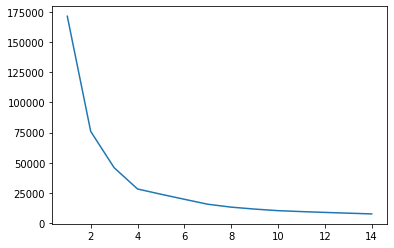

In [7]:
clusters = range(1,15)
noofclusters
a = sb.lineplot(x = clusters , y = noofclusters )

# Creating 8 clusters using K-Means Clustering

In [8]:
kmean = km(8)
kmeans = kmean.fit(x)


In [9]:
clus = kmean.fit_predict(x)
clus

array([5, 2, 7, 2, 5, 2, 7, 6, 3, 2, 3, 6, 3, 2, 7, 2, 1, 2, 1, 6, 1, 2,
       3, 2, 3, 6, 1, 2, 1, 6, 3, 2, 3, 6, 3, 2, 1, 2, 1, 2, 0, 6, 4, 2,
       1, 2, 4, 5, 5, 5, 4, 2, 5, 0, 4, 4, 4, 0, 5, 4, 0, 5, 0, 0, 0, 5,
       4, 0, 5, 5, 0, 4, 0, 0, 0, 5, 4, 4, 5, 4, 0, 4, 0, 4, 5, 4, 0, 5,
       2, 4, 0, 5, 4, 4, 5, 5, 4, 5, 4, 5, 5, 4, 0, 5, 4, 5, 0, 4, 0, 0,
       0, 5, 4, 5, 5, 5, 0, 4, 4, 4, 5, 4, 4, 6, 1, 2, 1, 6, 3, 2, 3, 2,
       5, 2, 7, 6, 3, 2, 7, 2, 3, 6, 5, 6, 7, 6, 4, 2, 1, 6, 1, 6, 1, 2,
       3, 6, 7, 2, 7, 2, 4, 6, 7, 6, 1, 2, 1, 6, 1, 2, 7, 2, 7, 6, 3, 6,
       3, 2, 3, 6, 1, 6, 3, 6, 4, 6, 3, 2, 1, 6, 1, 2, 7, 6, 3, 2, 1, 2,
       7, 6])

In [10]:
a = clus.copy()

# Inserting results of Clustering into Pandas DataFrame

In [11]:
df["no of clusters"] = a
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),no of clusters
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,7
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,7


# Creating scatter plot to highlight different clusters

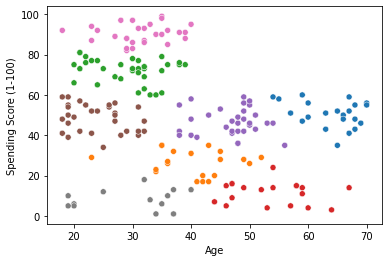

In [12]:
a = sb.scatterplot(y = "Spending Score (1-100)" , x = "Age" , data = df , hue= "no of clusters" , 
                   palette="tab10", legend=None)